<a href="https://colab.research.google.com/github/Ziedny28/ML/blob/master/uts/UTS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Liblary

In [74]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

## Mempersiapkan Gambar

In [75]:
from google.colab import drive

In [76]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import os

In [88]:
directory_path = '/content/drive/My Drive/uts-ml/data/'
os.chdir(directory_path)

In [89]:
import glob

In [90]:
# Membaca semua citra dari folder
image_files = []
for img_path in glob.glob(f'{directory_path}*.jpg'):
    noise = cv2.imread(img_path)
    image_files.append(noise)

In [91]:
def reshape_data(image):
  h, w, ch= image.shape
  data = image / 255.0
  data = data.reshape(h * w, ch)
  return data

In [92]:
def plot_pixels(data, title='Input color space: 16 million possible colors', colors=None, N=10000):

  if colors is None:
      colors = data

  # choose a random subset
  rng = np.random.RandomState(0)
  i = rng.permutation(data.shape[0])[:N]
  colors = colors[i]
  R, G, B = data[i].T

  fig, ax = plt.subplots(1, 2, figsize=(8, 4))
  ax[0].scatter(R, G, color=colors, marker='.')
  ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

  ax[1].scatter(R, B, color=colors, marker='.')
  ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

  fig.suptitle(title, size=14)

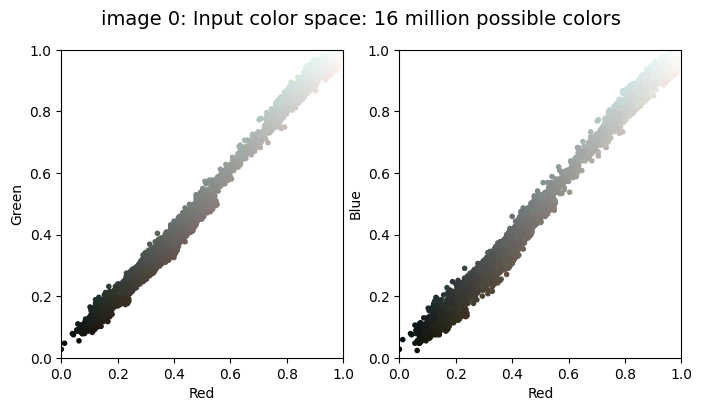

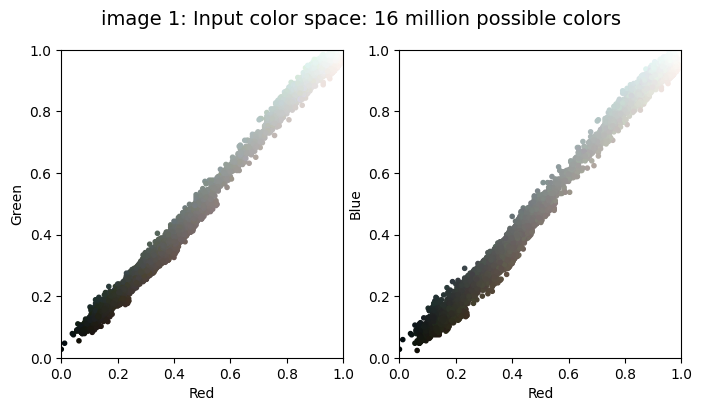

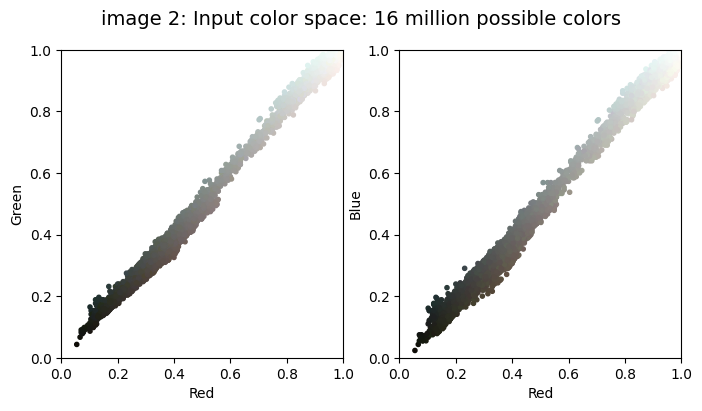

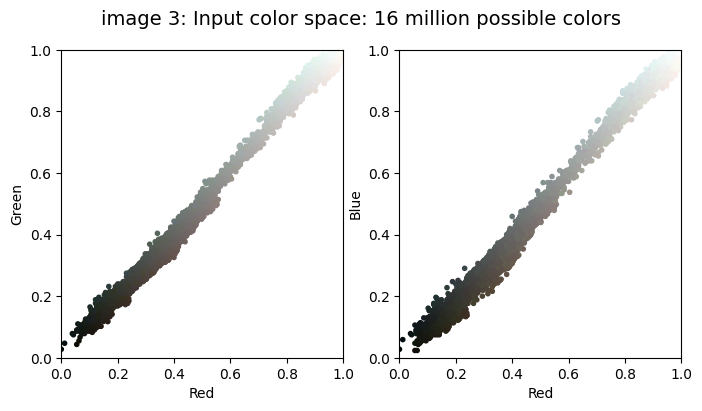

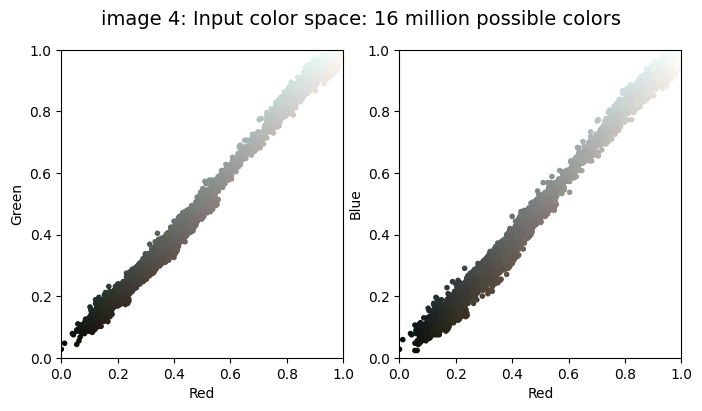

In [96]:
for i,image_file in enumerate(image_files):
  data = reshape_data(image_file)
  plot_pixels(data, title = f'image {i}: Input color space: 16 million possible colors')

## Heatmap

In [102]:
def compare_image(image_1, image_2, title_1 = "Original Image", title_2 = "New Image"):
  fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
  fig.subplots_adjust(wspace=0.05)
  ax[0].imshow(image_1)
  ax[0].set_title(title_1, size=16)
  ax[1].imshow(image_2)
  ax[1].set_title(title_2, size=16);

In [99]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.
from sklearn.cluster import MiniBatchKMeans

In [104]:

def cluster_image_minibatch(image, image_data):

  kmeans = MiniBatchKMeans(2)
  kmeans.fit(image_data)
  new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
  recolored = new_colors.reshape(image.shape)

  return (recolored)

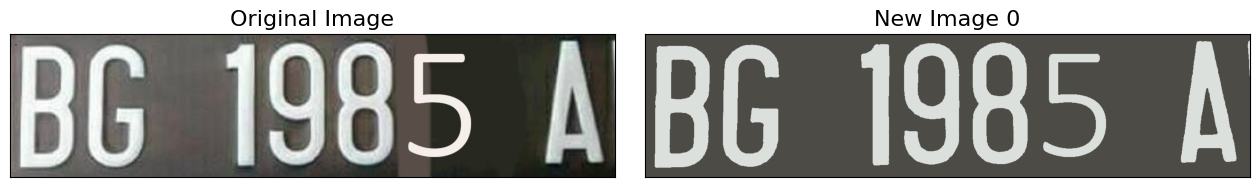

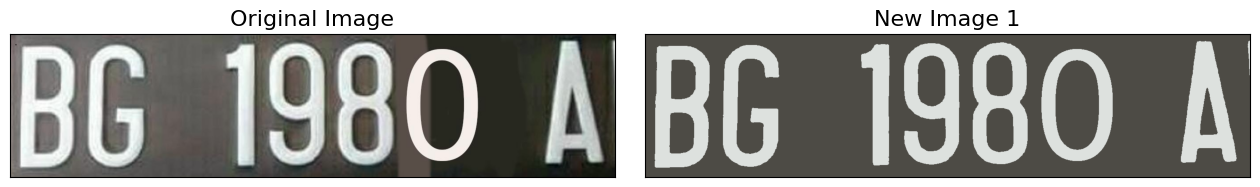

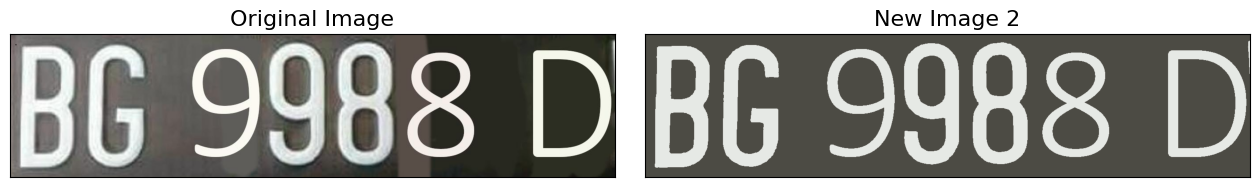

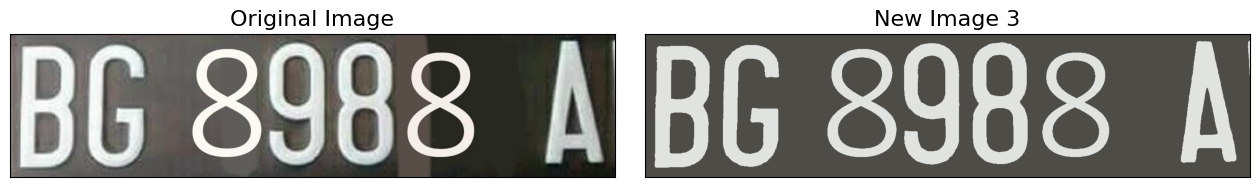

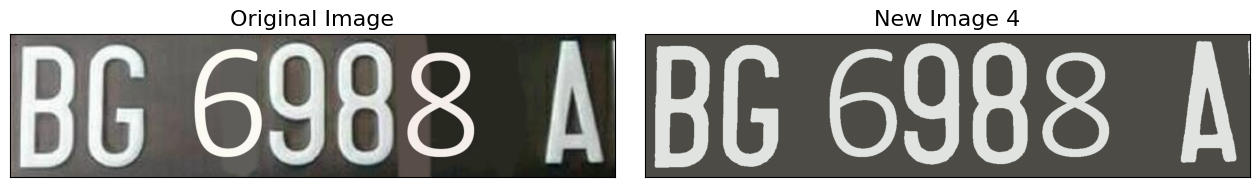

In [106]:
for i,image_file in enumerate(image_files):
  data = reshape_data(image_file)
  recolored = cluster_image_minibatch(image_file,data)
  compare_image(image_file, recolored, title_2 = f"New Image {i}")


## Cara Kedua

In [10]:
from sklearn.cluster import KMeans

In [110]:
def cluster_image_kmeans(image):
  X = image.reshape(-1,3)
  kmeans = KMeans(n_clusters = 2, n_init=10)

  kmeans.fit(data)
  segmented_image = kmeans.cluster_centers_[kmeans.labels_]
  segmented_image = segmented_image.reshape(image.shape)

  return segmented_image

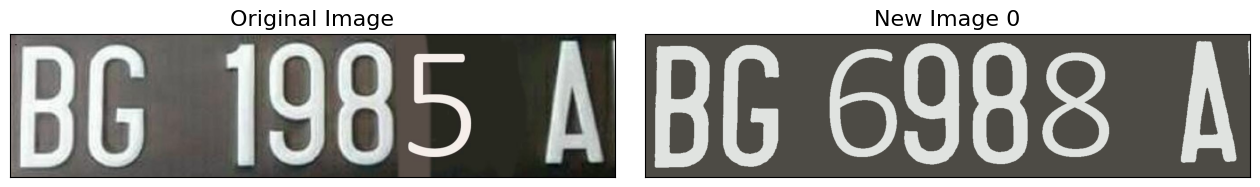

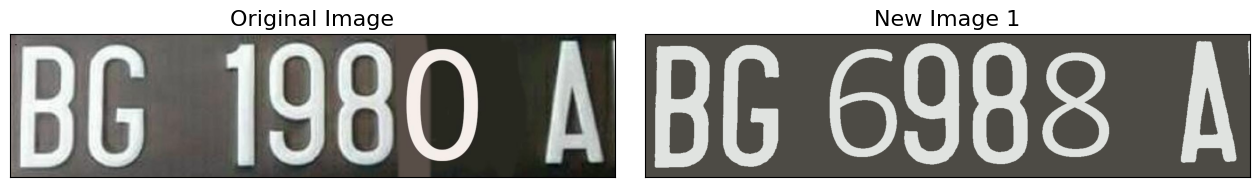

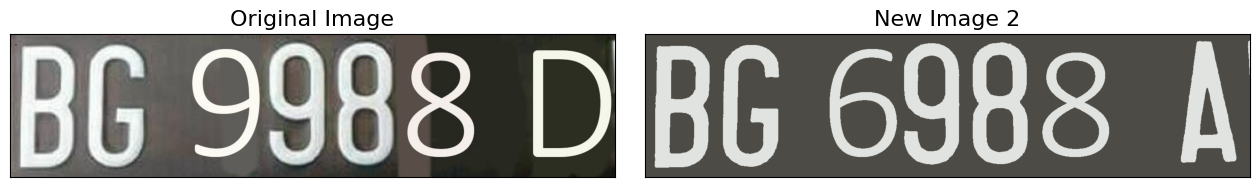

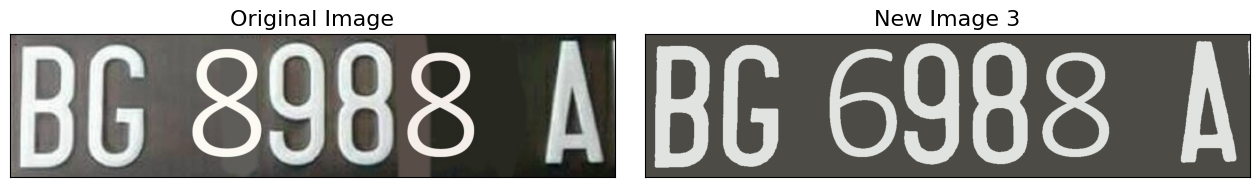

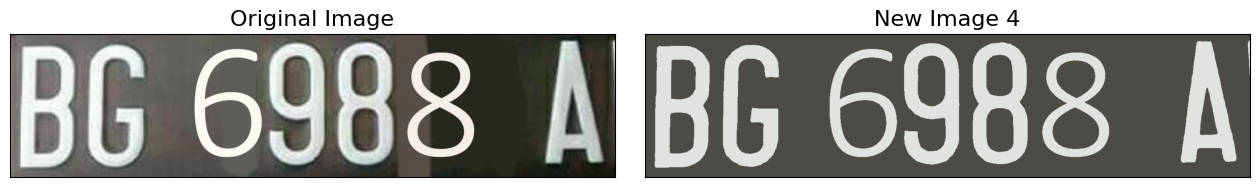

In [111]:
for i,image_file in enumerate(image_files):
  segmented_image = cluster_image_kmeans(image_file)
  compare_image(image_file, segmented_image, title_2 = f"New Image {i}")